In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist



In [75]:

from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import cv2

verbose = False



class IsingModel:

  def __init__(self,Y,alpha,beta, sigma_sqrd):
    # X = height x width
    # Gibbs distribution parameters : alpha, beta
    height,width = Y.shape
    X=Y.copy()
    self.height = height
    self.width = width
    self.alpha = alpha
    self.beta = beta
    self.X = X
    self.ss = sigma_sqrd
    self.Y = Y  # Y = Observed noisy image.


  def show(self,name):
      plt.figure(name)
      plt.imshow(self.X,cmap=cm.Greys_r)
      plt.show()


  def get_neighbors(self,i,j):
    neighbors = []
    neighbors.extend(([i-1,j+1],[i,j+1],[i+1,j+1]))
    neighbors.extend(([i-1,j],[i+1,j]))
    neighbors.extend(([i-1,j-1],[i,j-1],[i+1,j-1]))
    #take care of the boundaries.
    for n in range(len(neighbors)):
      [a,b] = neighbors[n]
      a = 0 if a<0 else a
      b = 0 if b<0 else b
      a = self.height-1 if a>=self.height else a
      b = self.width-1 if b>=self.width else b
      neighbors[n] = [a,b]
    #remove all occurrences if [i,j] from neighbors
    neighbors[:] = [a for a in neighbors if a != [i,j]]
    return neighbors


  def unnormalized_probability(self):
    energy = self.alpha * np.sum(self.X)
    pairwise = 0
    for i in range(self.height):
      for j in range(self.width):
          neighbors = self.get_neighbors(i,j)
          for neighbor_index in neighbors:
              pairwise += self.X[i,j]*self.X[neighbor_index[0],neighbor_index[1]]
    pairwise /= 2 #as each pair is counted twice
    energy += -self.beta * pairwise
    if verbose:
       print('energy=%f'%(energy))
    return np.exp(-energy)

  def conditional_probability(self,i,j):
      #print('cond denoise')
      neighbors = self.get_neighbors(i,j)
      energy = -self.alpha + self.beta*np.sum( self.X[x,y] for (x,y) in neighbors )
      term1 = np.exp(energy - (0.5/self.ss)*((self.Y[i,j]-1)**2) )
      term2 = np.exp(-energy - (0.5/self.ss)*((self.Y[i,j]+1)**2) )
      Prob_Xij_one_given_neighbors = float(term1)/(term1+term2)
      Prob_Xij_minus_one_given_neighbors = 1.0 - Prob_Xij_one_given_neighbors #float(term2)/(term1+term2)
      return [Prob_Xij_minus_one_given_neighbors,Prob_Xij_one_given_neighbors]


  def Gibbs_sampling(self,z):
    # z = [i,j]
    # sample from P( X[z] | N(X[z]) )
    i,j = z
    p_minus_one,p_one = self.conditional_probability(i,j)
    self.X[i,j]=-1 if np.random.rand()<=p_minus_one else 1


  def Metropolis_Hastings(self,z):
    i,j=z
    x=self.X[i,j]
    neighbors = self.get_neighbors(i,j)
    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta = np.exp(-2*self.X[i,j]*self.Y[i,j]/(self.ss) +2*self.alpha -2*self.beta*np.sum( self.X[x,y] for (x,y) in neighbors ))
    delta_E=min(1, delta)
    # Flip the pixel if accepted
    self.X[i,j]= x*(-1) if np.random.rand()<=delta else x






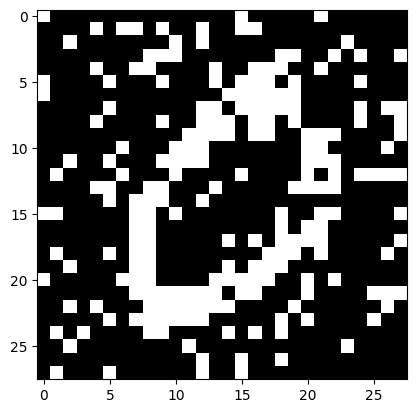

In [76]:
#read grayscale image, convert to binary
(X_train, _), (_, _) = mnist.load_data()

im = X_train[1]
_,im_binary = cv2.threshold(im,127,1,cv2.THRESH_BINARY)
im_binary = (im_binary.astype(int) * 2) - 1

#create a noisy binary image
noise = np.random.random(im_binary.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(im_binary*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

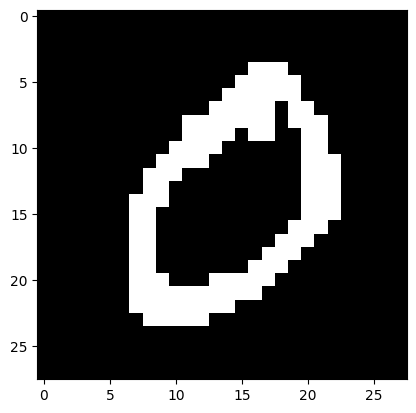

In [77]:
imgplot = plt.imshow(im_binary, cmap = cm.Greys_r)
plt.show()

Running 100 burn-in iterations...
burin_in = 0 
burin_in = 784 
burin_in = 1568 
burin_in = 2352 
burin_in = 3136 
burin_in = 3920 
burin_in = 4704 
burin_in = 5488 
burin_in = 6272 
burin_in = 7056 


<ipython-input-75-773364fff237>:73: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  energy = -self.alpha + self.beta*np.sum( self.X[x,y] for (x,y) in neighbors )


burin_in = 7840 
burin_in = 8624 
burin_in = 9408 
burin_in = 10192 
burin_in = 10976 
burin_in = 11760 
burin_in = 12544 
burin_in = 13328 
burin_in = 14112 
burin_in = 14896 
burin_in = 15680 
burin_in = 16464 
burin_in = 17248 
burin_in = 18032 
burin_in = 18816 
burin_in = 19600 
burin_in = 20384 
burin_in = 21168 
burin_in = 21952 
burin_in = 22736 
burin_in = 23520 
burin_in = 24304 
burin_in = 25088 
burin_in = 25872 
burin_in = 26656 
burin_in = 27440 
burin_in = 28224 
burin_in = 29008 
burin_in = 29792 
burin_in = 30576 
burin_in = 31360 
burin_in = 32144 
burin_in = 32928 
burin_in = 33712 
burin_in = 34496 
burin_in = 35280 
burin_in = 36064 
burin_in = 36848 
burin_in = 37632 
burin_in = 38416 
burin_in = 39200 
burin_in = 39984 
burin_in = 40768 
burin_in = 41552 
burin_in = 42336 
burin_in = 43120 
burin_in = 43904 
burin_in = 44688 
burin_in = 45472 
burin_in = 46256 
burin_in = 47040 
burin_in = 47824 
burin_in = 48608 
burin_in = 49392 
burin_in = 50176 
burin_in = 50

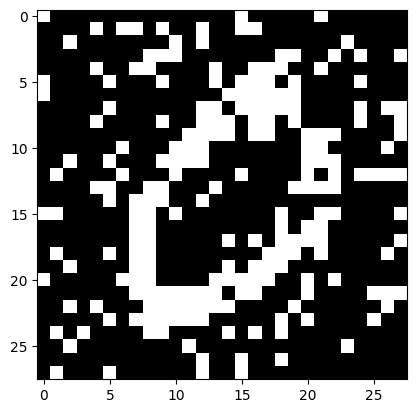

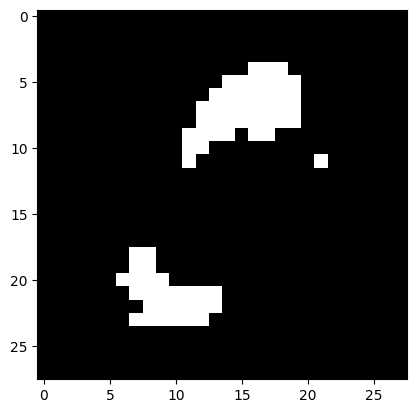

In [78]:

alpha = 0.0
beta = 0.3
sigma_squared = 1.4
num_burnin = 100
num_samples = 20
N = height*width

IMD = IsingModel(Y,alpha,beta,sigma_squared)

print('Running %d burn-in iterations...'%(num_burnin))
#burn-in iterations.
for n_burn_in in range(num_burnin):
   print('burin_in = %d '%(n_burn_in*N))
   for i in range(0,height):
      for j in range(0,width):
         IMD.Gibbs_sampling([i,j])

print('Sampling %d samples using Gibbs...'%(N*num_samples))
#now generate samples and take average.
avg = np.zeros_like(Y)

for n_samp in range(num_samples):
  print('s = %d '%(n_samp*N))
  for i in range(0,height):
      for j in range(0,width):
          IMD.Gibbs_sampling([i,j])
          avg += IMD.X

avg = avg.astype(float)
avg = avg/(N*num_samples)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(int)

plt.figure('noisy image')
imgplot = plt.imshow(Y, cmap = cm.Greys_r)

plt.figure('posterior mean after sampling')
imgplot = plt.imshow(avg, cmap = cm.Greys_r)

plt.show()

Metropolis-Hastings

Running 100000 burn-in iterations...
burin_in = 0 
burin_in = 784 
burin_in = 1568 
burin_in = 2352 
burin_in = 3136 
burin_in = 3920 
burin_in = 4704 
burin_in = 5488 
burin_in = 6272 
burin_in = 7056 
burin_in = 7840 
burin_in = 8624 
burin_in = 9408 


<ipython-input-75-773364fff237>:95: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  delta = np.exp(-2*self.X[i,j]*self.Y[i,j]/(self.ss) +2*self.alpha -2*self.beta*np.sum( self.X[x,y] for (x,y) in neighbors ))


Output streaming troncato alle ultime 5000 righe.
burin_in = 74496464 
burin_in = 74497248 
burin_in = 74498032 
burin_in = 74498816 
burin_in = 74499600 
burin_in = 74500384 
burin_in = 74501168 
burin_in = 74501952 
burin_in = 74502736 
burin_in = 74503520 
burin_in = 74504304 
burin_in = 74505088 
burin_in = 74505872 
burin_in = 74506656 
burin_in = 74507440 
burin_in = 74508224 
burin_in = 74509008 
burin_in = 74509792 
burin_in = 74510576 
burin_in = 74511360 
burin_in = 74512144 
burin_in = 74512928 
burin_in = 74513712 
burin_in = 74514496 
burin_in = 74515280 
burin_in = 74516064 
burin_in = 74516848 
burin_in = 74517632 
burin_in = 74518416 
burin_in = 74519200 
burin_in = 74519984 
burin_in = 74520768 
burin_in = 74521552 
burin_in = 74522336 
burin_in = 74523120 
burin_in = 74523904 
burin_in = 74524688 
burin_in = 74525472 
burin_in = 74526256 
burin_in = 74527040 
burin_in = 74527824 
burin_in = 74528608 
burin_in = 74529392 
burin_in = 74530176 
burin_in = 74530960 
burin

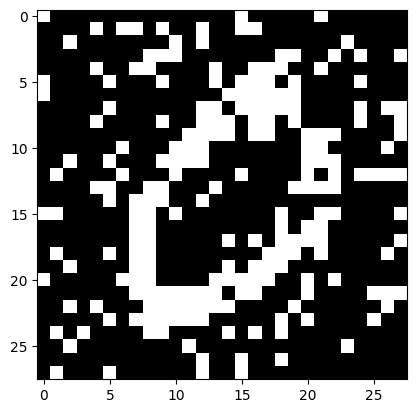

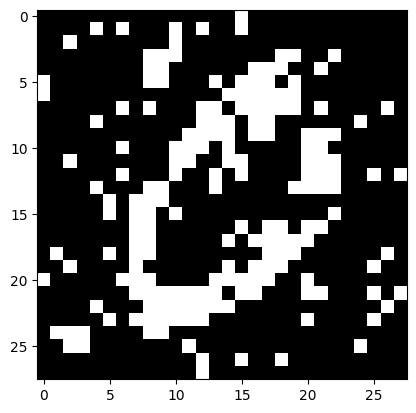

In [88]:


IMD = IsingModel(Y,alpha,beta,sigma_squared)
num_burnin=100000
print('Running %d burn-in iterations...'%(num_burnin))
#burn-in iterations.
for n_burn_in in range(num_burnin):
   print('burin_in = %d '%(n_burn_in*N))
   for i in range(0,height):
      for j in range(0,width):
         IMD.Metropolis_Hastings([i,j])

print('Sampling %d samples using M-H...'%(N*num_samples))
#now generate samples and take average.
avg = np.zeros_like(Y)



for n_samp in range(num_samples):
  print('s = %d '%(n_samp*N))
  for i in range(0,height):
      for j in range(0,width):
          IMD.Metropolis_Hastings([i,j])
          avg += IMD.X

avg = avg.astype(float)
avg = avg/(N*num_samples)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(int)



plt.figure('noisy image')
imgplot = plt.imshow(Y, cmap = cm.Greys_r)

plt.figure('posterior mean after sampling')
imgplot = plt.imshow(avg, cmap = cm.Greys_r)

plt.show()

In [86]:

Z = Y.copy()
num_burnin=1000

print('Running %d burn-in iterations...'%(num_burnin))
#burn-in iterations.
for n_burn_in in range(num_burnin):
   print('burin_in = %d '%(n_burn_in*N))
   for i in range(0,height):
      for j in range(0,width):
         # Calculate acceptance propability
         # We don't take exponential. Instead, we take the log of random number. This is more stable.
         delta = -2*Z[i,j]*Y[i,j]/(sigma_squared) +2*alpha*Z[i,j]  -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) + Z[i,j])
         # We also don't deal with minimum function for acceptance probability
         #   because we don't need to cast it to 1 if it is higher.
         # Flip the pixel if accepted
         delta_E= min(1, delta)
         if np.log(np.random.rand()) < delta_E:
           Z[i,j] = - Z[i,j] # Update the image

print('Sampling %d samples using M-H...'%(N*num_samples))
#now generate samples and take average.
avg = np.zeros_like(Y)



for n_samp in range(num_samples):
  print('s = %d '%(n_samp*N))
  for i in range(0,height):
      for j in range(0,width):
         # Calculate acceptance propability
         # We don't take exponential. Instead, we take the log of random number. This is more stable.
         delta = -2*Z[i,j]*Y[i,j]/(sigma_squared) +2*alpha*Z[i,j]    -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) + Z[i,j])
         # We also don't deal with minimum function for acceptance probability
         #   because we don't need to cast it to 1 if it is higher.
         # Flip the pixel if accepted
         delta_E= min(1, delta)
         if np.log(np.random.rand()) < delta_E:
           Z[i,j] = - Z[i,j] # Update the image
         avg += IMD.X

avg = avg.astype(float)
avg = avg/(N*num_samples)
avg[avg >= 0] = 1
avg[avg < 0] = -1
avg = avg.astype(int)



Running 1000 burn-in iterations...
burin_in = 0 
burin_in = 784 
burin_in = 1568 
burin_in = 2352 
burin_in = 3136 
burin_in = 3920 
burin_in = 4704 
burin_in = 5488 
burin_in = 6272 
burin_in = 7056 
burin_in = 7840 
burin_in = 8624 
burin_in = 9408 
burin_in = 10192 
burin_in = 10976 
burin_in = 11760 
burin_in = 12544 
burin_in = 13328 
burin_in = 14112 
burin_in = 14896 
burin_in = 15680 
burin_in = 16464 
burin_in = 17248 
burin_in = 18032 
burin_in = 18816 
burin_in = 19600 
burin_in = 20384 
burin_in = 21168 
burin_in = 21952 
burin_in = 22736 
burin_in = 23520 
burin_in = 24304 
burin_in = 25088 
burin_in = 25872 
burin_in = 26656 
burin_in = 27440 
burin_in = 28224 
burin_in = 29008 
burin_in = 29792 
burin_in = 30576 
burin_in = 31360 
burin_in = 32144 
burin_in = 32928 
burin_in = 33712 
burin_in = 34496 
burin_in = 35280 
burin_in = 36064 
burin_in = 36848 
burin_in = 37632 
burin_in = 38416 
burin_in = 39200 
burin_in = 39984 
burin_in = 40768 
burin_in = 41552 
burin_in =

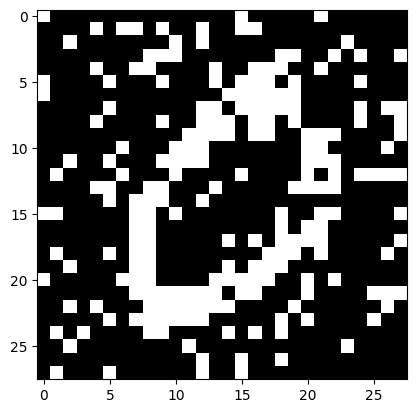

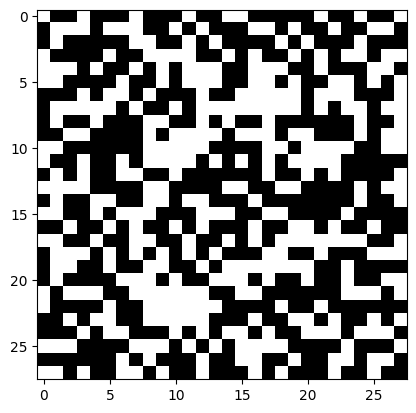

In [87]:

plt.figure('noisy image')
imgplot = plt.imshow(Y, cmap = cm.Greys_r)

plt.figure('posterior mean after sampling')
imgplot = plt.imshow(avg, cmap = cm.Greys_r)

plt.show()

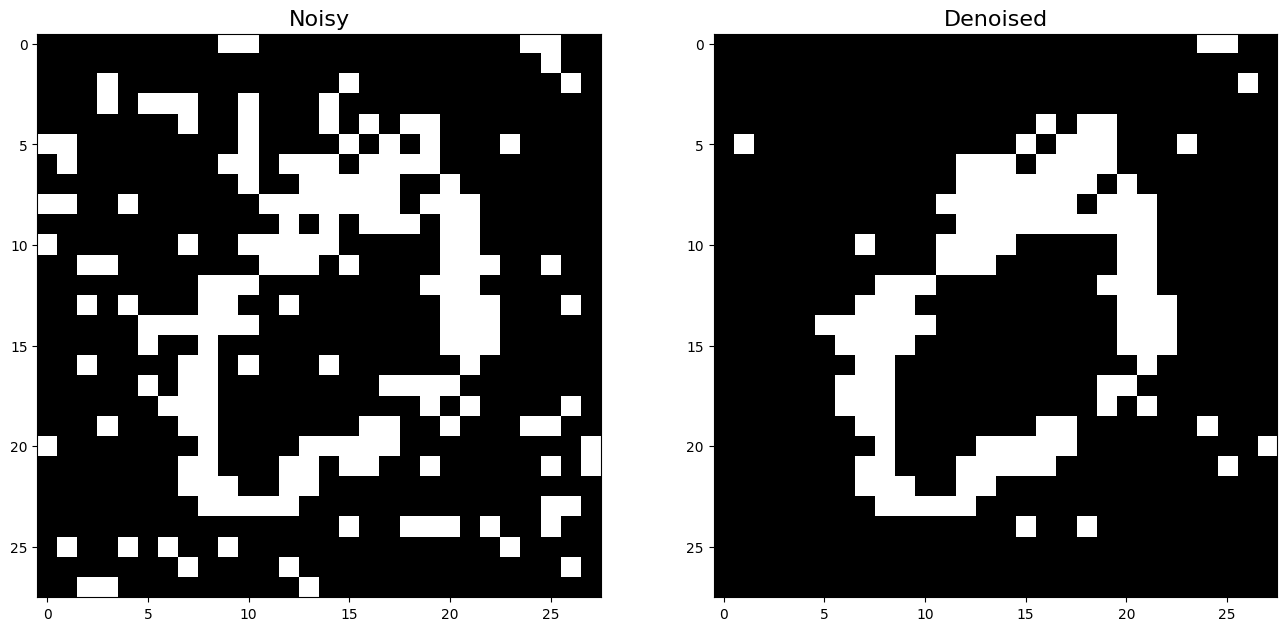

In [54]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Noisy", fontsize=16)
ax[1].imshow(Z,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Denoised", fontsize=16)
plt.show()